In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
FILE_PATH = r'C:\Users\hiyan\OneDrive\Documents\python eda\assignment 1 and 2\summer-products_2020-08..csv'

In [3]:
try:
    sp = pd.read_csv(FILE_PATH)
    print(f"--- Data Analysis for {FILE_PATH} ---")
    print(f"Initial Shape: {sp.shape}")
except FileNotFoundError:
    print(f"Error: The file '{FILE_PATH}' was not found. Please ensure the file is correctly uploaded.")
    # Create an empty DataFrame to avoid further errors if load fails
    sp = pd.DataFrame()

--- Data Analysis for C:\Users\hiyan\OneDrive\Documents\python eda\assignment 1 and 2\summer-products_2020-08..csv ---
Initial Shape: (958, 14)


In [4]:
if not sp.empty:
    print(sp.head())

   index                merchantid  listedproducts  totalunitssold  \
0      0  5357bcf2bb72c5504882e889               2          120000   
1      1  5708773c3c02161b3f8c7900               5          107100   
2      2  5417aada4ad3ab27e954b76c               2          100007   
3      3  570f3a713a698c14278bb51e               1          100000   
4      4  53082ea15aefb07dfe1f2a4f               1          100000   

   meanunitssoldperproduct  rating  merchantratingscount  meanproductprices  \
0                  60000.0   4.219              320031.0               9.00   
1                  21420.0   3.934              139223.0               7.76   
2                  50004.0   4.053              108048.0               8.00   
3                 100000.0   3.889               19248.0               5.67   
4                 100000.0   4.036              366898.0               5.00   

   meanretailprices  averagediscount  meandiscount  meanproductratingscount  \
0              20.0      

In [5]:
duplicate_count = sp.duplicated().sum()
print(f"\nDuplicate rows found: {duplicate_count}")

if duplicate_count > 0:
        sp.drop_duplicates(inplace=True)
        print(f"Duplicates dropped. New Shape: {sp.shape}")
else:
        print("No duplicates found.")



Duplicate rows found: 0
No duplicates found.


In [6]:
print("\n--- Data Information (Checking Dtypes and Nulls) ---")
sp.info(verbose=False)


--- Data Information (Checking Dtypes and Nulls) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958 entries, 0 to 957
Columns: 14 entries, index to urgencytextrate
dtypes: float64(10), int64(3), object(1)
memory usage: 104.9+ KB


In [7]:
print("\n--- Detailed Null Value Count ---")
null_counts = sp.isnull().sum().sort_values(ascending=False)


--- Detailed Null Value Count ---


In [8]:
print(null_counts[null_counts > 0])

urgencytextrate      567
totalurgencycount    567
dtype: int64


In [9]:
print("\n--- Descriptive Statistics ---")
desc_stats = sp.describe().transpose()
print(desc_stats)


--- Descriptive Statistics ---
                         count          mean           std     min       25%  \
index                    958.0    478.500000    276.695079   0.000   239.250   
listedproducts           958.0      1.641962      1.246183   1.000     1.000   
totalunitssold           958.0   7124.483299  14363.521893   1.000   100.000   
meanunitssoldperproduct  958.0   4407.605428   9167.077812   1.000   100.000   
rating                   958.0      4.043994      0.222137   2.333     3.931   
merchantratingscount     958.0  22020.446764  84732.317971   0.000  1373.000   
meanproductprices        958.0      8.634906      3.987599   1.000     6.000   
meanretailprices         958.0     24.802265     30.258719   1.000     7.000   
averagediscount          958.0     28.721294     39.918708 -18.000   -10.000   
meandiscount             958.0     28.698017     39.914269 -18.000   -10.000   
meanproductratingscount  958.0    922.538622   1925.750178   0.000    31.000   
totalurg

In [10]:
print("\n--- Generating Distribution Plots (Histograms & Countplot) ---")


--- Generating Distribution Plots (Histograms & Countplot) ---


In [11]:
hist_cols = ['totalunitssold', 'meanunitssoldperproduct', 'rating',
                 'merchantratingscount', 'meanproductprices', 'averagediscount']

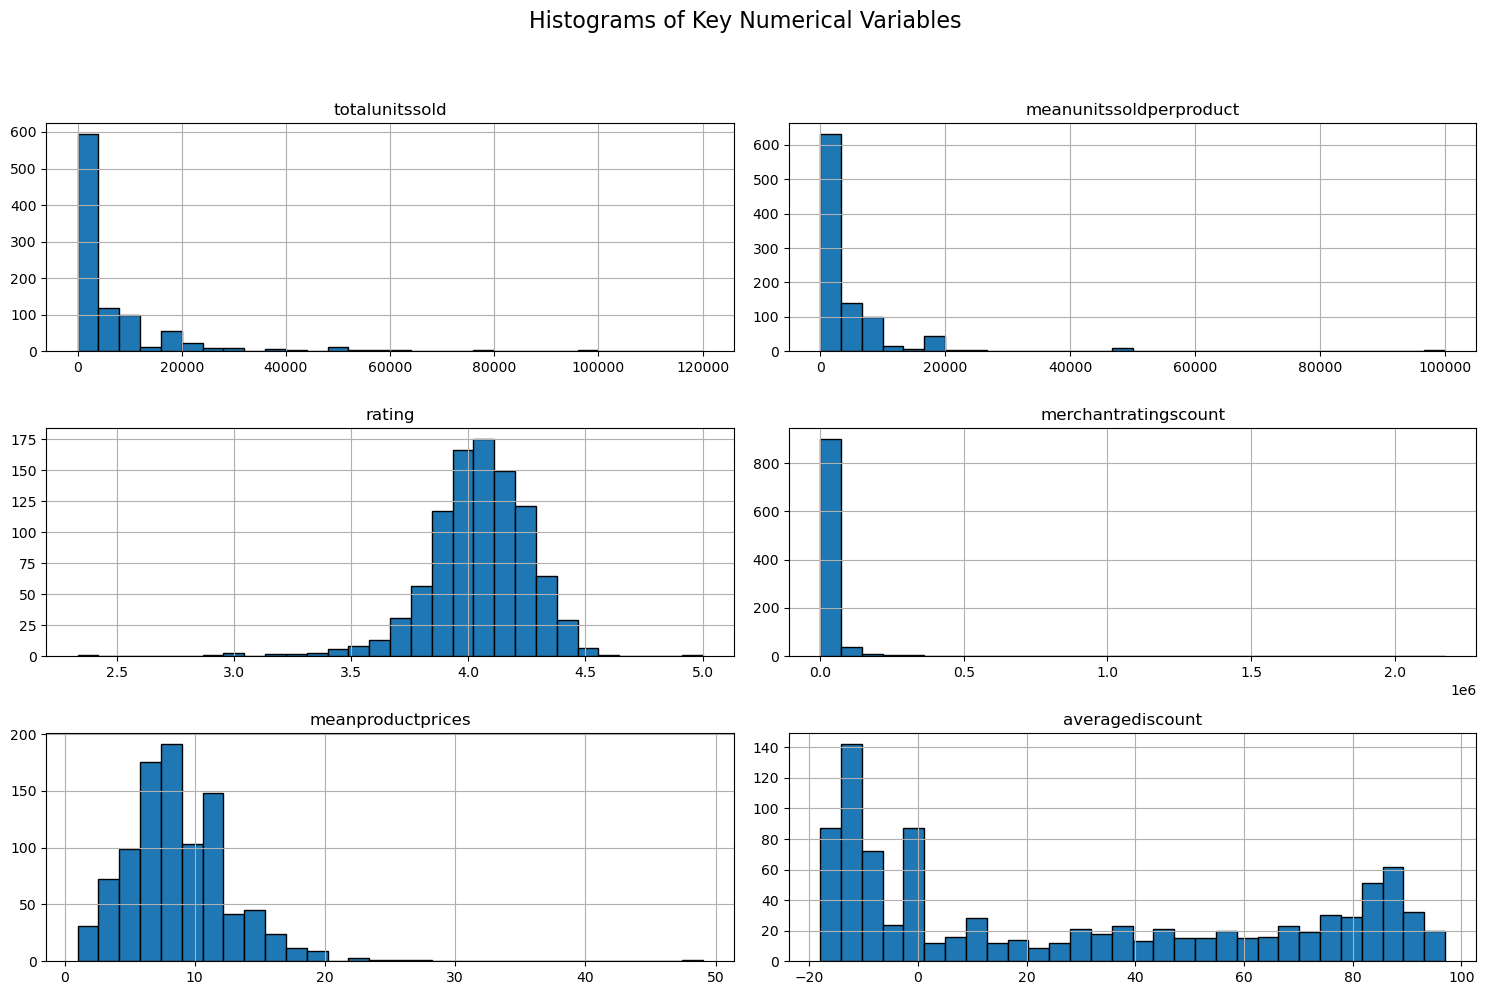

In [12]:
sp[hist_cols].hist(figsize=(15, 10), bins=30, edgecolor='black')
plt.suptitle('Histograms of Key Numerical Variables', y=1.02, fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.show()

C:\Users\hiyan\AppData\Local\Temp\ipykernel_30928\3879685875.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='listedproducts', data=sp, palette='viridis',


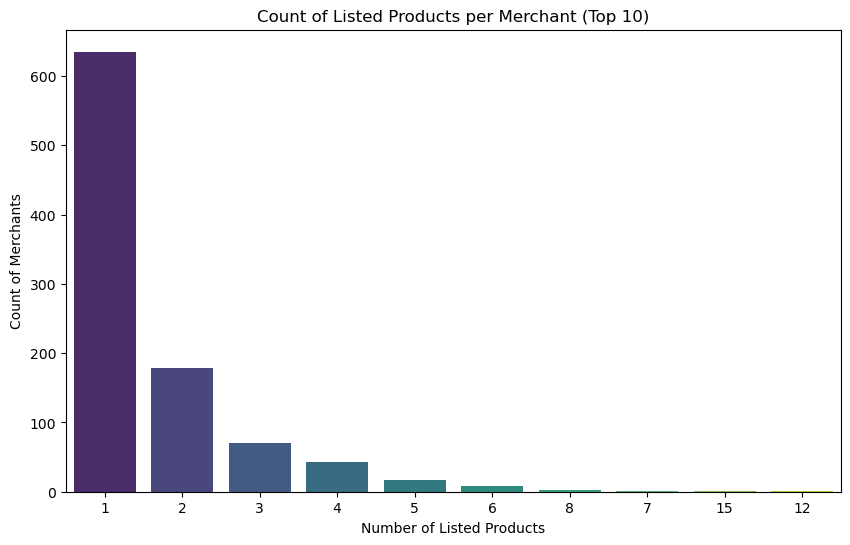

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(x='listedproducts', data=sp, palette='viridis',
                  order=sp['listedproducts'].value_counts().nlargest(10).index)
plt.title('Count of Listed Products per Merchant (Top 10)')
plt.xlabel('Number of Listed Products')
plt.ylabel('Count of Merchants')
plt.show()


--- Generating Boxplot for Product Ratings ---


C:\Users\hiyan\AppData\Local\Temp\ipykernel_30928\1532972210.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=sp['rating'], palette='pastel')


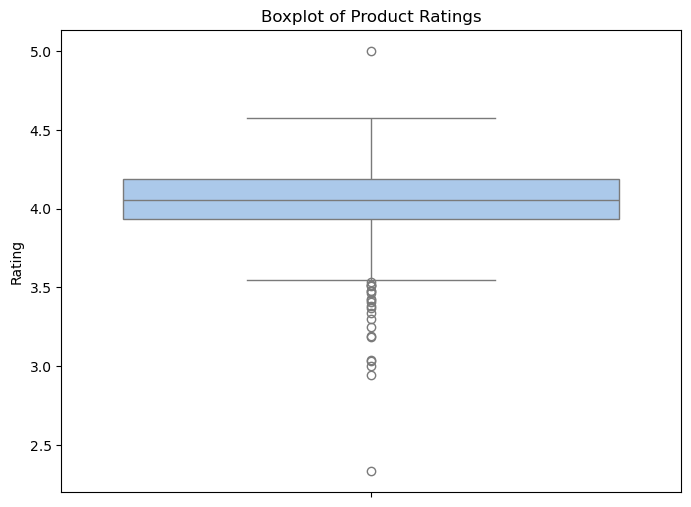

In [14]:
print("\n--- Generating Boxplot for Product Ratings ---")
plt.figure(figsize=(8, 6))
sns.boxplot(y=sp['rating'], palette='pastel')
plt.title('Boxplot of Product Ratings')
plt.ylabel('Rating')
plt.show()


--- Correlation Matrix and Heatmap ---


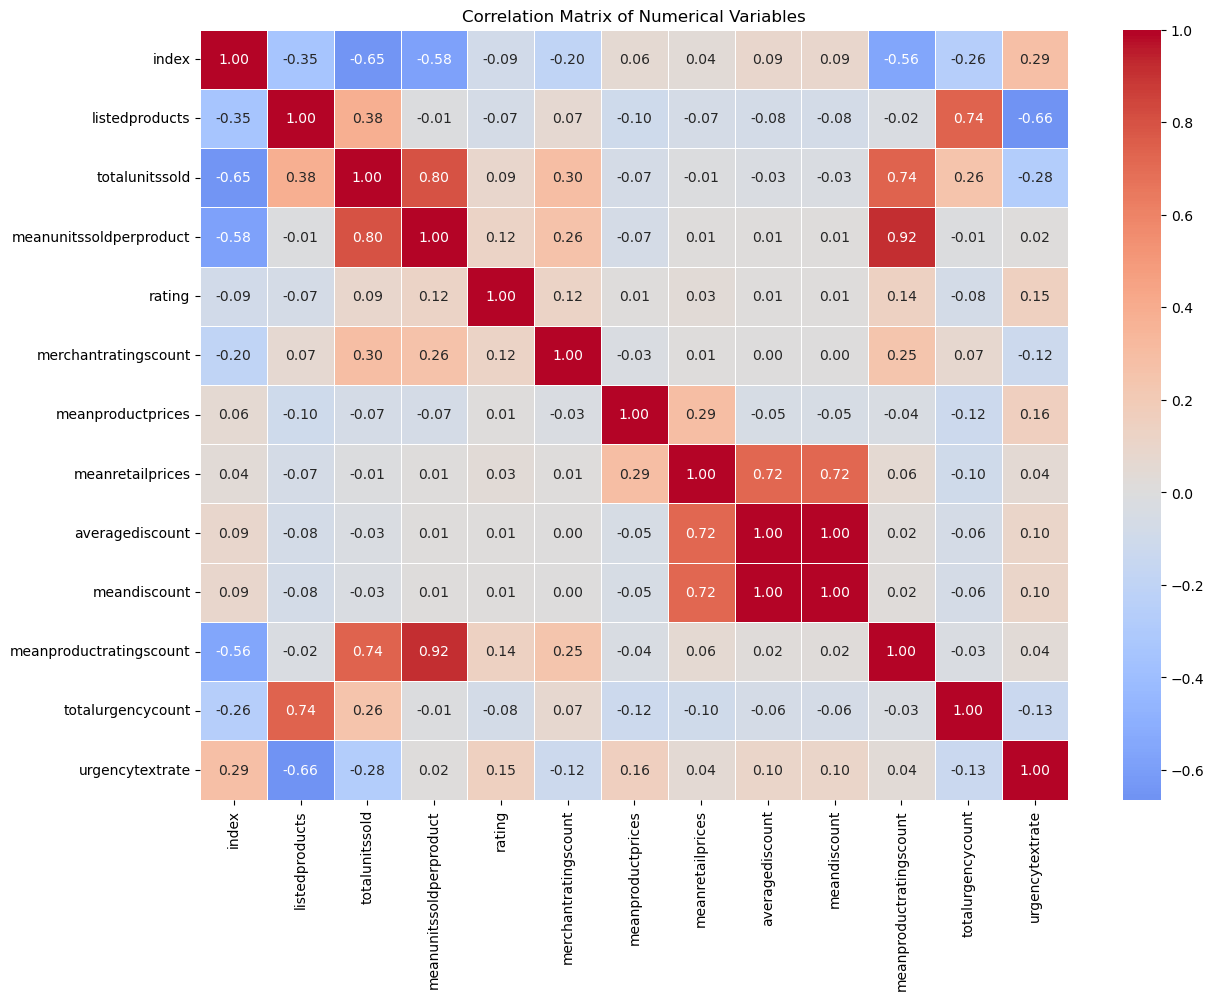


Correlation with Total Units Sold (Top 5):
meanunitssoldperproduct    0.804250
meanproductratingscount    0.738898
listedproducts             0.383373
merchantratingscount       0.296667
totalurgencycount          0.256122
Name: totalunitssold, dtype: float64

--- Analysis Complete ---


In [15]:
print("\n--- Correlation Matrix and Heatmap ---")


numeric_df = sp.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", center=0, linewidths=.5)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

if 'totalunitssold' in correlation_matrix.columns:
        sales_corr = correlation_matrix['totalunitssold'].sort_values(ascending=False)
        print("\nCorrelation with Total Units Sold (Top 5):")
        print(sales_corr.head(6).iloc[1:]) # Skip self-correlation
else:
        print("'totalunitssold' column not found in correlation matrix.")

print("\n--- Analysis Complete ---")
